### Import necessary libraries and data

In [1]:
import pandas as pd

path = "data/melb_data.csv"
data = pd.read_csv(path)

In [2]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Drop obvious columns which shouldn't have impact on data

In [4]:
data.drop(['Address', 'Method', 'SellerG', 'Date', 'Postcode', 'Lattitude', 'Longtitude', 'Propertycount'], axis=1, inplace=True)

In [5]:
data.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [6]:
data.size

176540

### Drop missing values

In [7]:
data.dropna(inplace=True)

In [8]:
data.size

80548

### Convert non-numerical values

In [9]:
from sklearn.preprocessing import LabelEncoder

# Convert object columns to integers
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [10]:
data

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
1,0,2,0,1035000.0,2.5,2.0,1.0,0.0,156.0,79.00,1900.0,29,2
2,0,3,0,1465000.0,2.5,3.0,2.0,0.0,134.0,150.00,1900.0,29,2
4,0,4,0,1600000.0,2.5,3.0,1.0,2.0,120.0,142.00,2014.0,29,2
6,0,3,0,1876000.0,2.5,4.0,2.0,0.0,245.0,210.00,1910.0,29,2
7,0,2,0,1636000.0,2.5,2.0,1.0,2.0,256.0,107.00,1890.0,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,278,3,0,601000.0,35.5,3.0,2.0,1.0,972.0,149.00,1996.0,27,3
12206,279,3,0,1050000.0,6.8,3.0,1.0,0.0,179.0,115.00,1890.0,10,6
12207,279,1,2,385000.0,6.8,1.0,1.0,1.0,0.0,35.64,1967.0,10,6
12209,281,2,2,560000.0,4.6,2.0,1.0,1.0,0.0,61.60,2012.0,25,5


### Assign independent(X) and dependent(y) variables

In [11]:
y = data.Price
X = data.drop('Price', axis=1, inplace=False)

### Fitting a decision tree model

In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=5)
model.fit(X, y)

DecisionTreeRegressor(random_state=5)

In [13]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
   Suburb  Rooms  Type  Distance  Bedroom2  Bathroom  Car  Landsize  \
1       0      2     0       2.5       2.0       1.0  0.0     156.0   
2       0      3     0       2.5       3.0       2.0  0.0     134.0   
4       0      4     0       2.5       3.0       1.0  2.0     120.0   
6       0      3     0       2.5       4.0       2.0  0.0     245.0   
7       0      2     0       2.5       2.0       1.0  2.0     256.0   

   BuildingArea  YearBuilt  CouncilArea  Regionname  
1          79.0     1900.0           29           2  
2         150.0     1900.0           29           2  
4         142.0     2014.0           29           2  
6         210.0     1910.0           29           2  
7         107.0     1890.0           29           2  
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [14]:
y.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

In [15]:
model

DecisionTreeRegressor(random_state=5)

# Exploratory Data Analysis (EDA)

In [16]:
print("Shape of the dataset:", data.shape)
print("\nData types:\n", data.dtypes)

print("\nMissing values:\n", data.isnull().sum())


Shape of the dataset: (6196, 13)

Data types:
 Suburb            int32
Rooms             int64
Type              int32
Price           float64
Distance        float64
Bedroom2        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
CouncilArea       int32
Regionname        int32
dtype: object

Missing values:
 Suburb          0
Rooms           0
Type            0
Price           0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
dtype: int64


In [17]:
data.describe()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
count,6196.000000,6196.000000,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,141.733376,2.931407,0.583280,1.068828e+06,9.751097,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,14.678502,3.824403
std,83.202191,0.971079,0.853992,6.751564e+05,5.612065,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,9.217256,1.986514
min,0.000000,1.000000,0.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,0.000000,0.000000
25%,64.000000,2.000000,0.000000,6.200000e+05,5.900000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,6.000000,2.000000
50%,141.000000,3.000000,0.000000,8.800000e+05,9.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,16.000000,5.000000
75%,214.250000,4.000000,1.000000,1.325000e+06,12.400000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,22.000000,5.000000
max,286.000000,8.000000,2.000000,9.000000e+06,47.400000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,30.000000,7.000000


### Visualising the price distribution

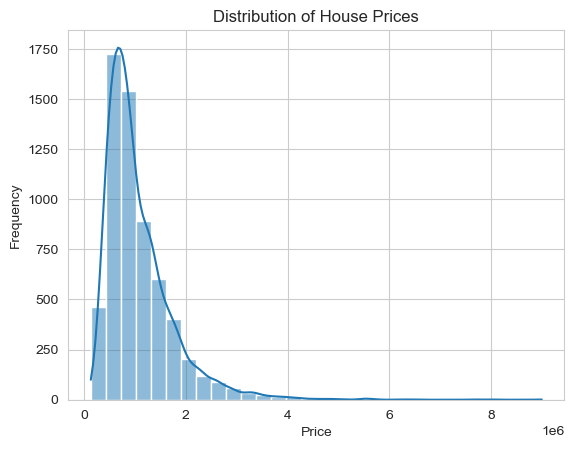

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['Price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


### Visualising the features

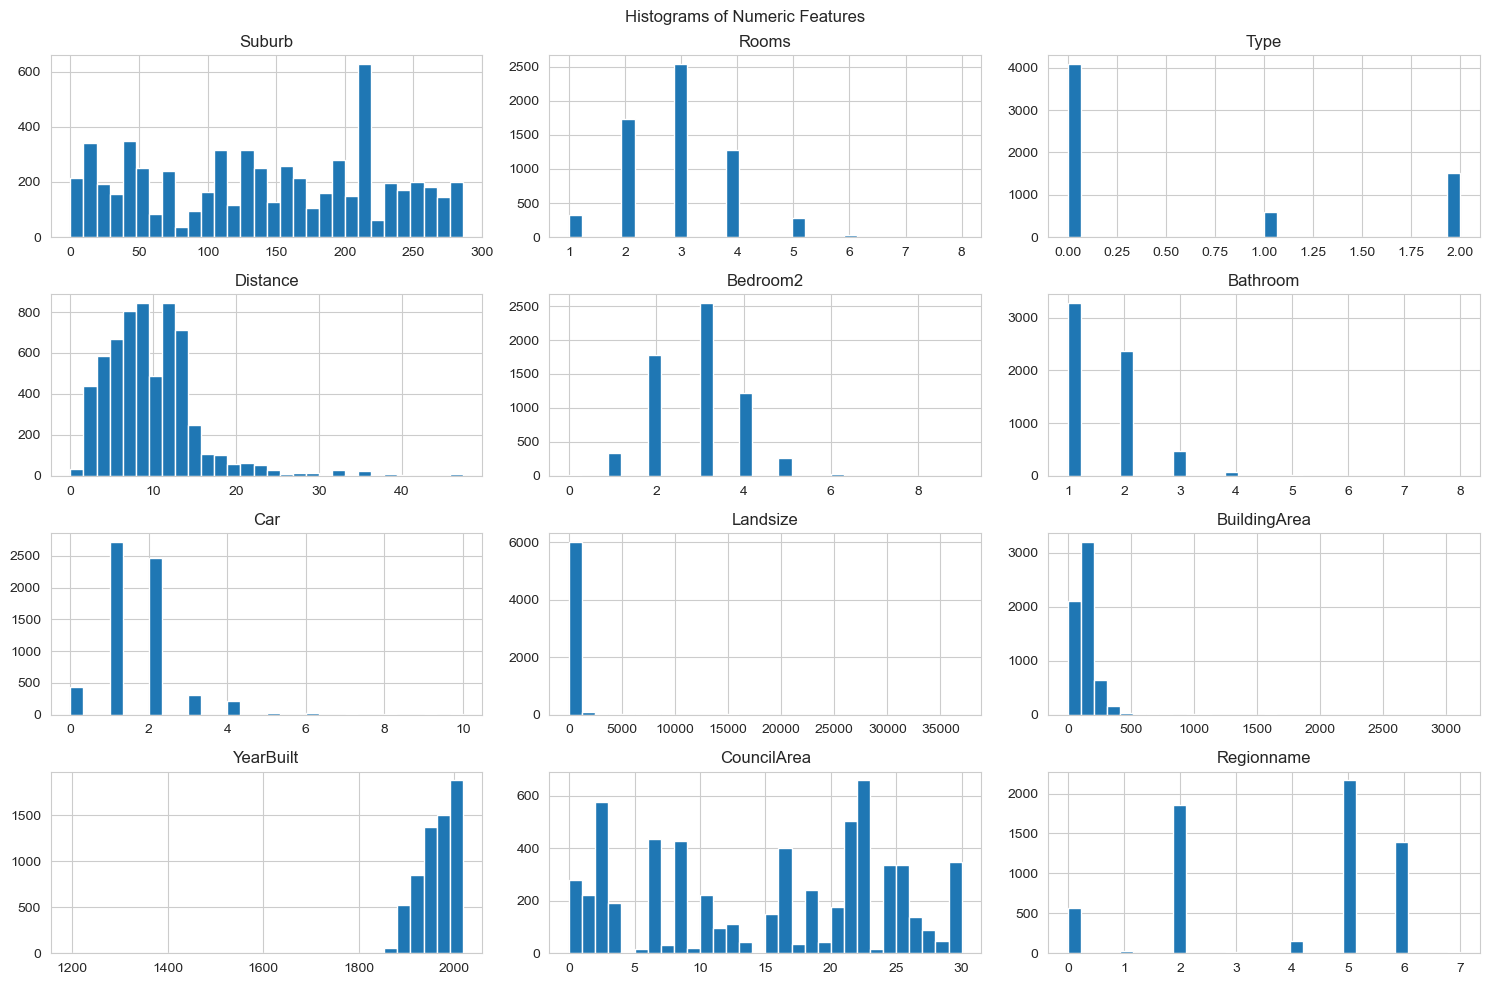

In [19]:
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()


### Detecting outliers

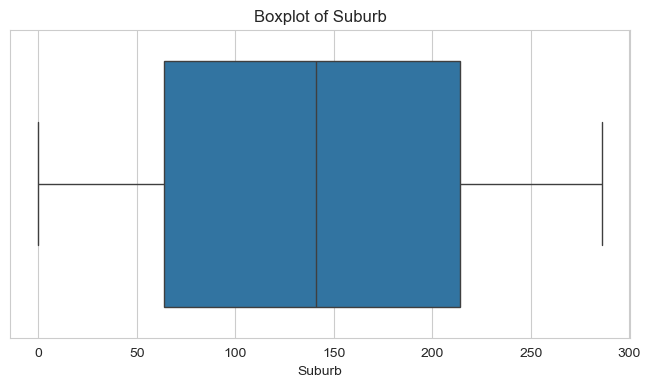

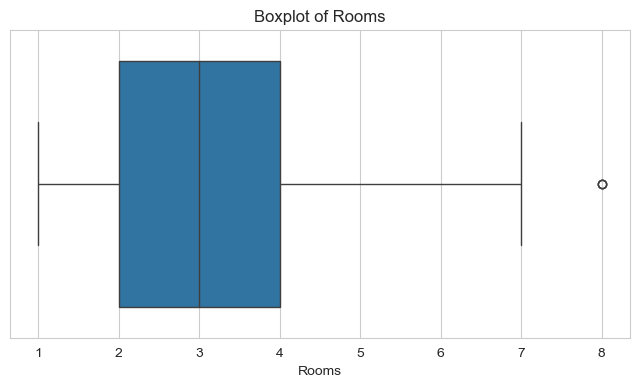

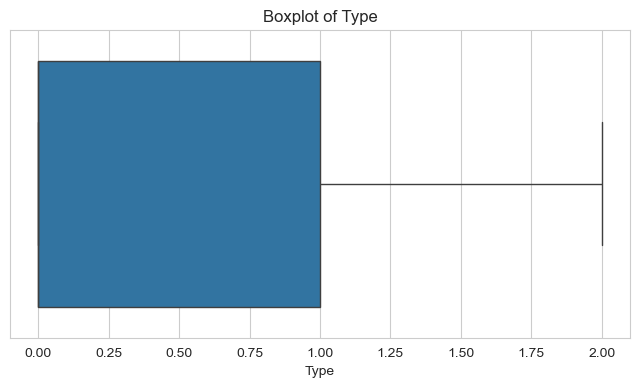

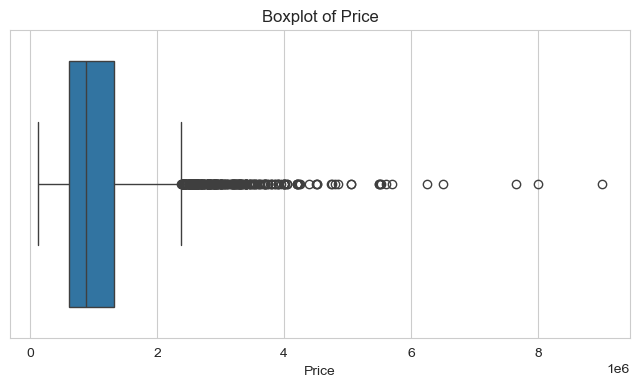

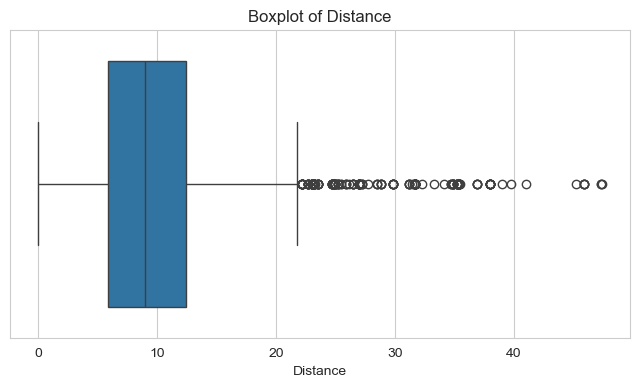

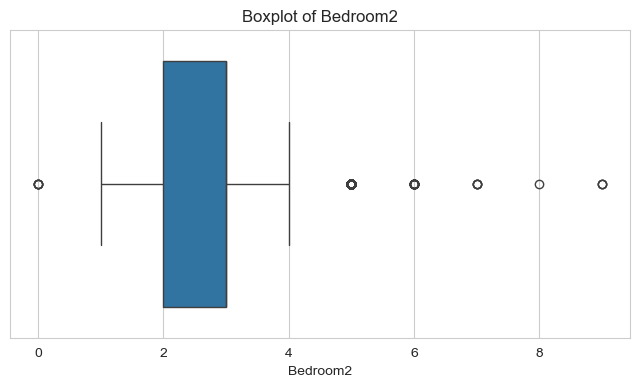

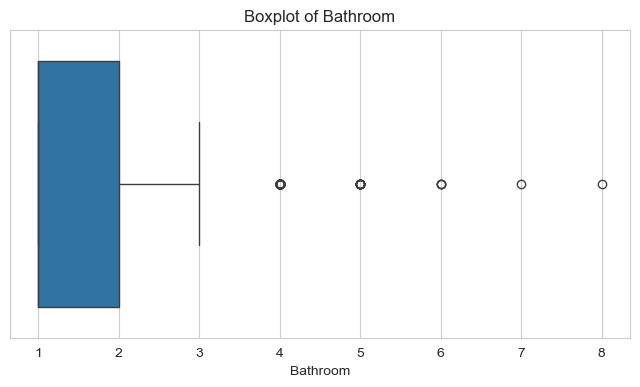

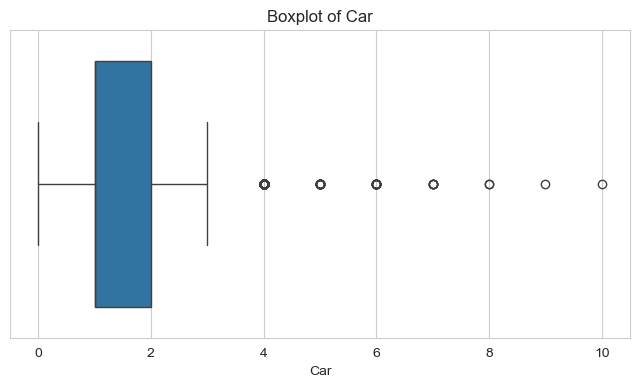

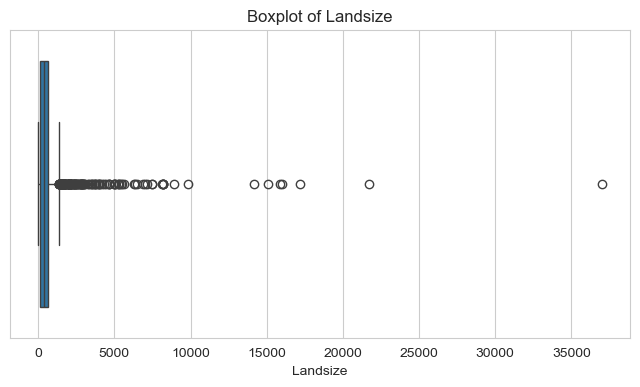

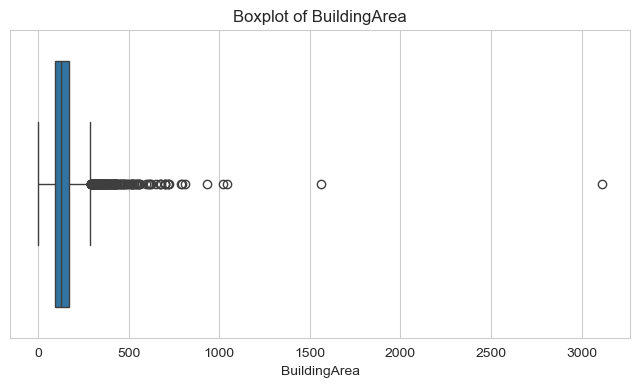

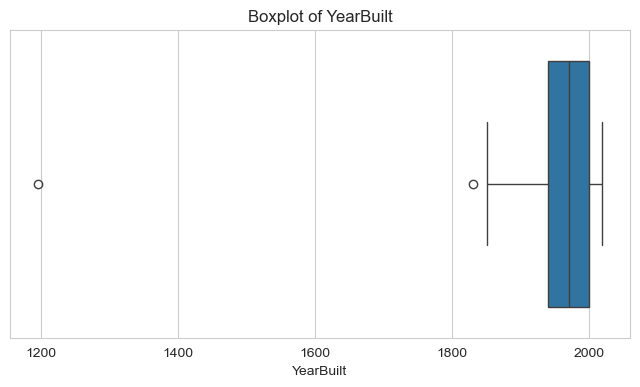

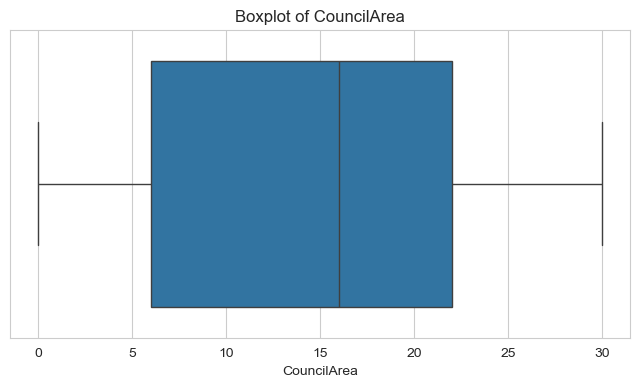

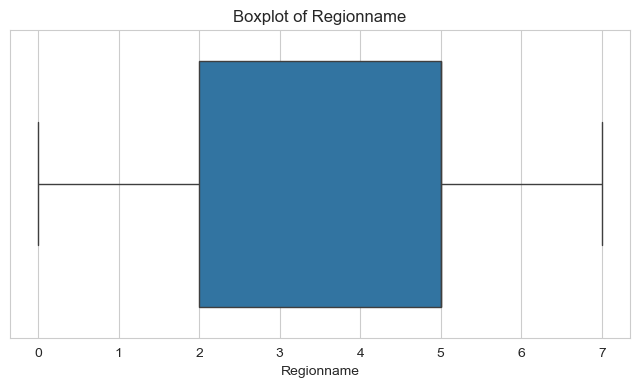

In [20]:
for col in data:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Removing outliers

In [21]:
for col in data:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [22]:
data.shape

(5013, 13)

### Finding relationships between price and features

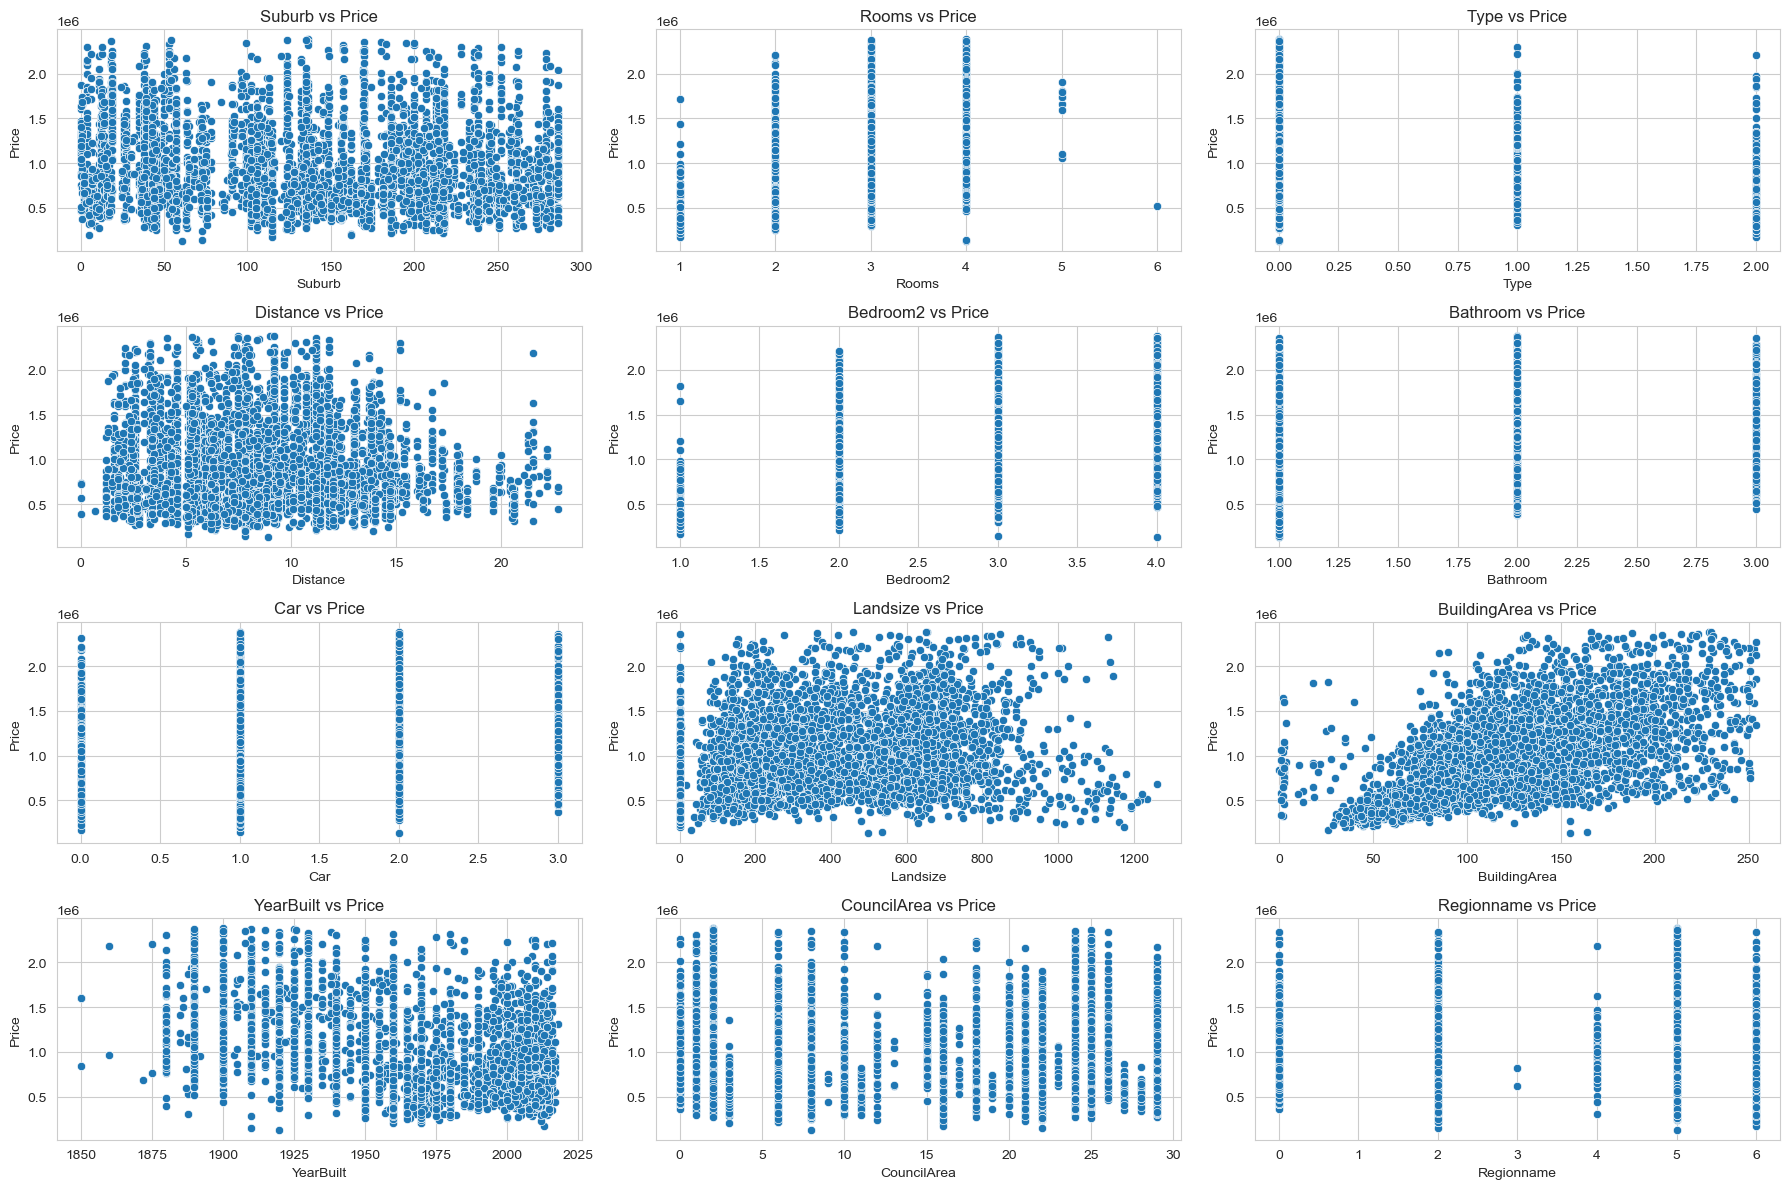

In [23]:
num_cols = len(data.drop('Price', axis=1).columns)
fig, axes = plt.subplots(nrows=(num_cols + 2) // 3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(data.drop('Price', axis=1).columns):
    sns.scatterplot(ax=axes[i], x=data[col], y=data['Price'])
    axes[i].set_title(f"{col} vs Price")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the graphs, we can see that rooms, land size and building area have an impact on price|

### Finally making the correlation matrix

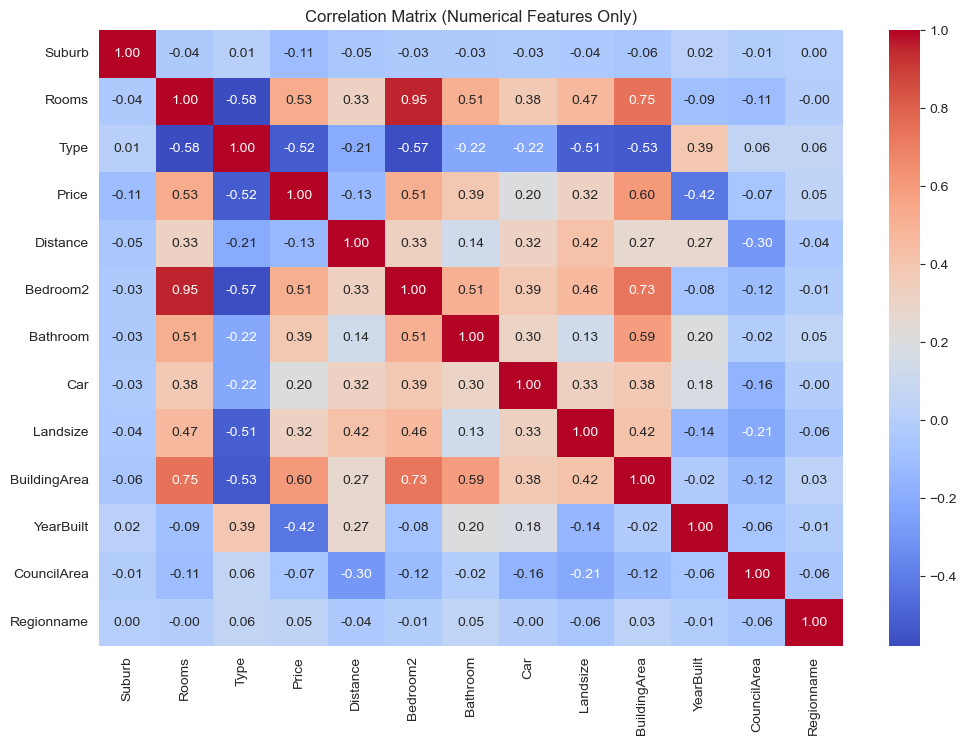

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()


### Thus, for price, thr relevant columns are (considering values >= 0.5) Rooms, Type, Bedroom2 and BuildingArea. The rest of the features can be removed before analysis